# Lucy's Work - Covid-19 Detection using VGG16

In [106]:

import numpy as np 
import pandas as pd 
import tensorboard
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [107]:
data = './dataset'

In [108]:
os.listdir(data)

['covid', 'normal']

In [127]:
normal_images = []
for img_path in glob.glob(data + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('Normal Image')


Text(0.5, 0.98, 'Normal Image')

<Figure size 432x288 with 0 Axes>

## <font color='blue'> Covid Image</font>

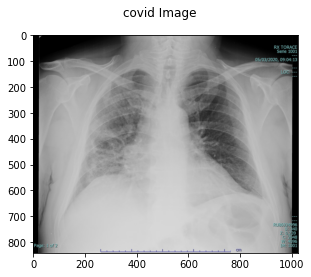

In [110]:
covid_images = []
for img_path in glob.glob(data + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid Image')


In [111]:
Image_Width = 150
Image_Height = 150
Cannels = 3

INPUT_SHAPE = (Image_Width, Image_Height, Cannels)
NB_CLASSES = 2
EPOCHS = 45
BATCH_SIZE = 6

In [112]:

from tensorflow.keras.applications import VGG16
VGG = VGG16(weights="imagenet" , include_top=False , input_shape = INPUT_SHAPE)
for layer in VGG.layers[:8]:
    layer.trainable = False
model = Sequential()
model.add(VGG)
model = Sequential()
model.add(VGG16)
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [113]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy']) #The optimizer can be changed to adam also based on your preference.

In [114]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_15 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)            

In [115]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data, 
    target_size=(Image_Height, Image_Width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)

Found 74 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/45
12/12 [==============================] - 6s 492ms/step - batch: 5.5000 - size: 5.6667 - loss: 3.0585 - accuracy: 0.7500 - val_loss: 4.4989 - val_accuracy: 0.7083
Epoch 2/45
12/12 [==============================] - 7s 552ms/step - batch: 5.5000 - size: 5.6667 - loss: 5.5701 - accuracy: 0.6471 - val_loss: 4.4989 - val_accuracy: 0.7083
Epoch 3/45
12/12 [==============================] - 6s 523ms/step - batch: 5.5000 - size: 5.6667 - loss: 4.2847 - accuracy: 0.7353 - val_loss: 4.4989 - val_accuracy: 0.7083
Epoch 4/45
12/12 [==============================] - 6s 478ms/step - batch: 5.5000 - size: 6.0000 - loss: 4.2847 - accuracy: 0.7222 - val_loss: 4.4989 - val_accuracy: 0.7083
Epoch 5/45
12/12 [==============================] - 5s 456ms/step - batch: 5.5000 - size: 5.6667 - loss: 4.0705 - accuracy: 0.7500 - val_loss: 4.4989 - val_accuracy: 0.7083
Epoch 6/45
12/12 [==============================] - 5s 

In [116]:
model.save_weights('saved_model/')

In [117]:
model.load_weights("saved_model/")

In [118]:
classes = train_generator.class_indices 
print(classes)

{'covid': 0, 'normal': 1}


In [119]:
from keras.preprocessing import image
import numpy as np
img = image.load_img('./temp/nrml1.jpeg', target_size=(Image_Width, Image_Height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print(classes[0][0])

0


## <font color='blue'>Accuracy and Loss Graphs</font>

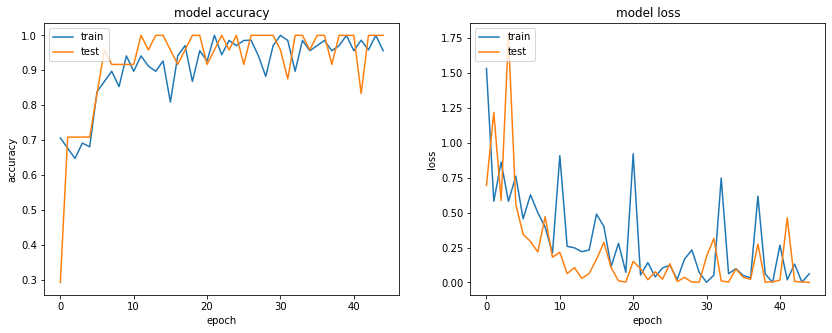

In [11]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

## <font color='blue'> Model Accuracy data </font>

In [12]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9558823704719543
validation_accuracy 1.0


In [120]:
label = validation_generator.classes
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{'covid': 0, 'normal': 1}
['covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid', 'covid']


## <font color='blue'>Confusion Matrix </font>

<AxesSubplot:>

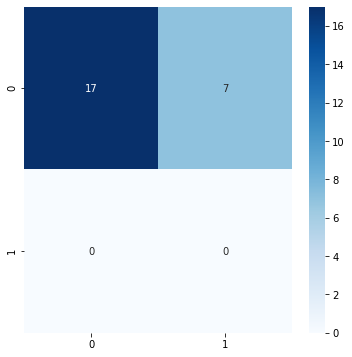

In [121]:
plt.figure(figsize = (6,6))
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(predicted_class_indices,label)
sns.heatmap(cf,cmap= "Blues", linecolor = 'black' , annot = True, fmt='')